# Wine Reviews 数据分析
## 一、数据概况

In [10]:
import pandas as pd

filename = "building-violations.csv"
data = pd.read_csv(filename)

# 显示前5行数据
data.head()

,ID,VIOLATION LAST MODIFIED DATE,VIOLATION DATE,VIOLATION CODE,VIOLATION STATUS,VIOLATION STATUS DATE,VIOLATION DESCRIPTION,VIOLATION LOCATION,VIOLATION INSPECTOR COMMENTS,VIOLATION ORDINANCE,...,SSA,LATITUDE,LONGITUDE,LOCATION,Community Areas,Zip Codes,Boundaries - ZIP Codes,Census Tracts,Wards,Historical Wards 2003-2015
0,6392482,2019-12-04T12:40:09.000,2019-12-04T00:00:00.000,CN196019,OPEN,NaN,NO POSTED ADDRESS,OTHER : :OTHER,BUILDING ADRESSES - INCOMPLETE WITH MISSING #'S.,Post address of building in conspicuous place ...,...,NaN,41.749169,-87.602551,"{'latitude': '41.749169067345306', 'human_addr...",40.0,21546.0,61.0,247.0,35.0,9.0
1,6392480,2019-12-04T12:40:09.000,2019-12-04T00:00:00.000,CN061014,OPEN,NaN,REPAIR EXTERIOR WALL,OTHER : :OTHER,WEST AND SOUTH ELEVATIONS / EXTERIOR WALLS - M...,Failed to maintain the exterior walls of a bui...,...,NaN,41.749169,-87.602551,"{'latitude': '41.749169067345306', 'human_addr...",40.0,21546.0,61.0,247.0,35.0,9.0
2,6392335,2019-12-04T14:00:12.000,2019-12-04T00:00:00.000,CN138106,OPEN,NaN,STOP/REMOVE NUISANCE,OTHER : :OTHER,YARD AREA; ABANDON VEHICLE.,Remove and stop nuisance. (7-28-060),...,NaN,41.711751,-87.537842,"{'latitude': '41.71175105491413', 'human_addre...",49.0,21202.0,25.0,528.0,47.0,47.0
3,6391883,2019-12-04T08:32:01.000,2019-12-04T00:00:00.000,CN197039,OPEN,NaN,RELOCATE SMOKE DETECTOR,INTERIOR:003 :,HALLWAY - SMOKE DETECTOR - 4FT BELOW CEILING.,Relocate improperly installed smoke detectors....,...,25.0,41.844521,-87.712416,"{'latitude': '41.84452110252742', 'human_addre...",32.0,21569.0,57.0,755.0,28.0,14.0
4,6392369,2019-12-04T14:14:24.000,2019-12-04T00:00:00.000,CN065034,OPEN,NaN,REPAIR WINDOW SILLS,OTHER : :OTHER,EAST WINDOW SILLS; OPEN JOINTS.,Failed to maintain window sill in good repair ...,...,NaN,41.753908,-87.562784,"{'latitude': '41.75390787131238', 'human_addre...",39.0,22538.0,24.0,246.0,37.0,43.0


In [11]:
# 显示数据集的概况
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677788 entries, 0 to 1677787
Data columns (total 32 columns):
ID                              1677788 non-null int64
VIOLATION LAST MODIFIED DATE    1677788 non-null object
VIOLATION DATE                  1677788 non-null object
VIOLATION CODE                  1677788 non-null object
VIOLATION STATUS                1677788 non-null object
VIOLATION STATUS DATE           641589 non-null object
VIOLATION DESCRIPTION           1667020 non-null object
VIOLATION LOCATION              780506 non-null object
VIOLATION INSPECTOR COMMENTS    1502325 non-null object
VIOLATION ORDINANCE             1630207 non-null object
INSPECTOR ID                    1677788 non-null object
INSPECTION NUMBER               1677788 non-null int64
INSPECTION STATUS               1677772 non-null object
INSPECTION WAIVED               1677788 non-null object
INSPECTION CATEGORY             1677788 non-null object
DEPARTMENT BUREAU               1677788 non-null ob

In [12]:
# 去掉无法填补的数据
data = data.drop(columns=['ID', 'VIOLATION DESCRIPTION', 'VIOLATION INSPECTOR COMMENTS'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677788 entries, 0 to 1677787
Data columns (total 29 columns):
VIOLATION LAST MODIFIED DATE    1677788 non-null object
VIOLATION DATE                  1677788 non-null object
VIOLATION CODE                  1677788 non-null object
VIOLATION STATUS                1677788 non-null object
VIOLATION STATUS DATE           641589 non-null object
VIOLATION LOCATION              780506 non-null object
VIOLATION ORDINANCE             1630207 non-null object
INSPECTOR ID                    1677788 non-null object
INSPECTION NUMBER               1677788 non-null int64
INSPECTION STATUS               1677772 non-null object
INSPECTION WAIVED               1677788 non-null object
INSPECTION CATEGORY             1677788 non-null object
DEPARTMENT BUREAU               1677788 non-null object
ADDRESS                         1677788 non-null object
STREET NUMBER                   1677788 non-null int64
STREET DIRECTION                1677788 non-null ob

## 二、数据可视化和摘要
### 2.1 标称属性
对于标称属性，给出每个可能聚会的频数，并进行可视化

VIOLATION STATUS
OPEN        1030958
COMPLIED     641247
NO ENTRY       5583
Name: VIOLATION STATUS, dtype: int64


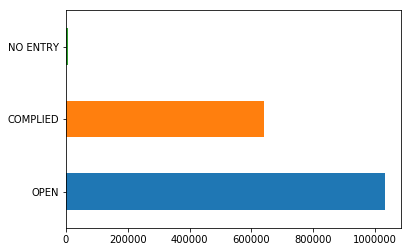

In [14]:
title_nominal = ['VIOLATION LAST MODIFIED DATE', 'VIOLATION DATE', 'VIOLATION CODE', 
                 'VIOLATION STATUS', 'VIOLATION STATUS DATE', 'VIOLATION LOCATION', 
                 'VIOLATION ORDINANCE', 'INSPECTOR ID', 'INSPECTION NUMBER', 'INSPECTION STATUS', 
                 'INSPECTION WAIVED', 'INSPECTION CATEGORY', 'DEPARTMENT BUREAU', 'ADDRESS', 
                 'STREET NUMBER', 'STREET DIRECTION', 'STREET NAME', 'STREET TYPE', 'PROPERTY GROUP', 
                 'SSA', 'LOCATION', 'Community Areas','Zip Codes','Boundaries - ZIP Codes','Census Tracts']
i = 3
# 打印数据名称
print(title_nominal[i])
# 打印频数
print(getattr(data, title_nominal[i]).value_counts())
# 给出频数前10的数据绘制而成的堆积图
data[title_nominal[i]].value_counts().head(10).plot.barh()

### 2.2 数值属性
#### 2.2.1 五数概括

In [15]:
# 使用describe()函数，可以得到总数、均值、标准差、最小值、第一四分位数、第二四分位数、第三四分位数、最大值
data.describe()

,INSPECTION NUMBER,STREET NUMBER,PROPERTY GROUP,SSA,LATITUDE,LONGITUDE,Community Areas,Zip Codes,Boundaries - ZIP Codes,Census Tracts,Wards,Historical Wards 2003-2015
count,1.677788e+06,1.677788e+06,1.677788e+06,321521.000000,1.676278e+06,1.676278e+06,1.675509e+06,1.676278e+06,1.675509e+06,1.676243e+06,1.675509e+06,1.675509e+06
mean,8.049798e+06,4.150382e+03,2.020547e+05,33.769197,4.184566e+01,-8.767266e+01,3.873350e+01,1.933197e+04,3.118135e+01,3.800659e+02,2.513030e+01,2.750858e+01
std,4.555757e+06,2.893493e+03,1.862796e+05,17.428210,8.742421e-02,5.760184e-02,2.008963e+01,5.606228e+03,1.943930e+01,2.290619e+02,1.498690e+01,1.530544e+01
min,2.655750e+05,1.000000e+00,1.000000e+03,1.000000,4.164467e+01,-8.791444e+01,1.000000e+00,4.299000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,2.304416e+06,1.648000e+03,2.056000e+04,22.000000,4.177090e+01,-8.771392e+01,2.400000e+01,2.119000e+04,1.500000e+01,1.790000e+02,1.200000e+01,1.400000e+01
50%,1.041875e+07,3.747000e+03,1.543230e+05,34.000000,4.185400e+01,-8.766985e+01,3.600000e+01,2.156900e+04,2.800000e+01,3.740000e+02,2.500000e+01,2.800000e+01
75%,1.168728e+07,6.228000e+03,3.669840e+05,49.000000,4.191350e+01,-8.763288e+01,5.800000e+01,2.224800e+04,5.200000e+01,5.720000e+02,3.700000e+01,4.100000e+01
max,1.305092e+07,1.377000e+04,6.779750e+05,69.000000,4.202269e+01,-8.752468e+01,7.700000e+01,2.262000e+04,6.100000e+01,8.010000e+02,5.000000e+01,5.300000e+01


可以得到各列的五数概括

#### 2.2.2 缺失值统计

In [25]:
print('LATITUDE', data['LATITUDE'].isnull().sum())
print('LONGITUDE', data['LONGITUDE'].isnull().sum())
print('LOCATION', data['LOCATION'].isnull().sum())
print('Zip Codes', data['Zip Codes'].isnull().sum())
print('STREET NUMBER', data['STREET NUMBER'].isnull().sum())
print('PROPERTY GROUP', data['PROPERTY GROUP'].isnull().sum())

LATITUDE 1510
LONGITUDE 1510
LOCATION 1510
Zip Codes 1510
STREET NUMBER 0
PROPERTY GROUP 0


#### 2.2.3 数据可视化
直方图

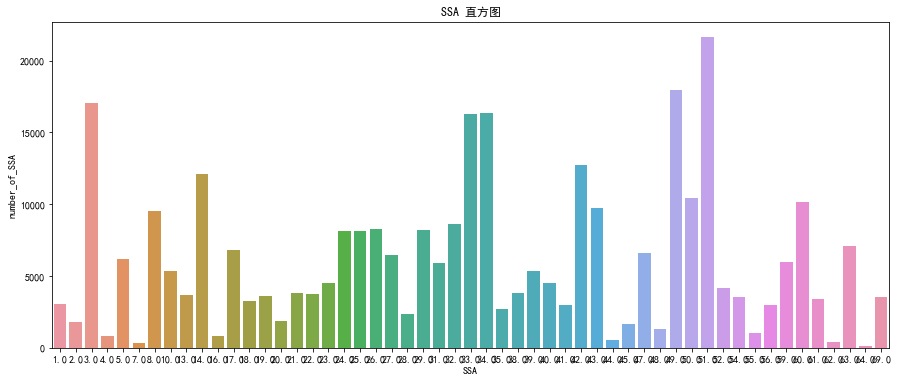

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def hist(data, x, y ,title):
    plt.figure(figsize = (15,6))
    plt.title(title)
    sns.barplot(x=x, y=y, data=data)
    locs, labels = plt.xticks()
    plt.show()

# SSA
temp = data['SSA'].value_counts()
data_SSA = pd.DataFrame({'SSA':temp.index, 'number_of_SSA':temp.values})
hist(data_SSA, 'SSA', 'number_of_SSA', 'SSA 直方图')

盒图

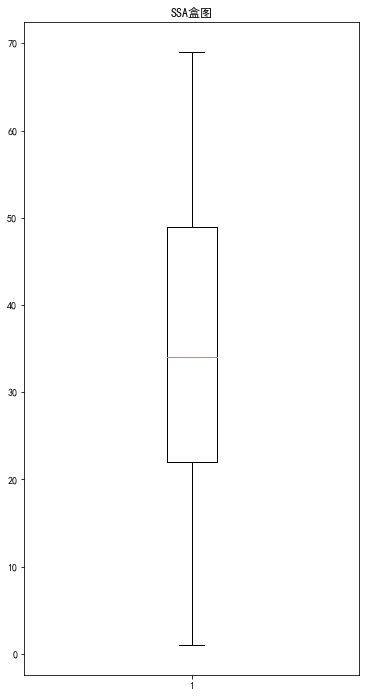

In [19]:
#SSA
fig = plt.figure(figsize=(6, 12))
plt.boxplot(data['SSA'].loc[data['SSA'] < 100], notch=False, sym='o', vert=True)
t = plt.title('SSA盒图')
plt.show()

## 三、数据缺失的处理
### 3.1 将缺失部分剔除

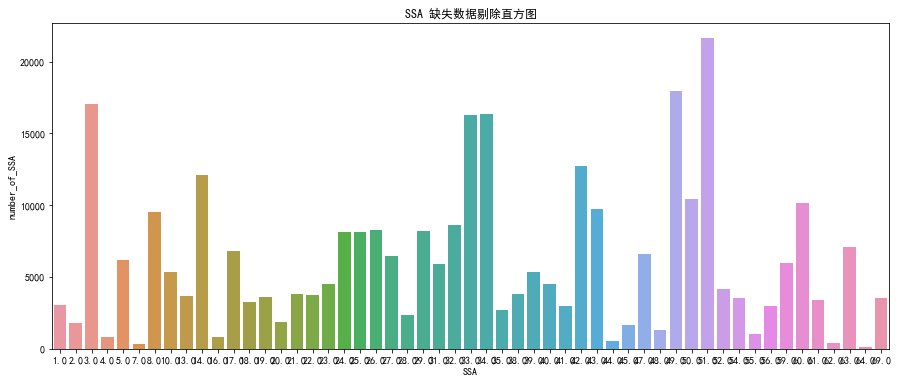

In [20]:
# 以SSA为例
SSA_delete = data['SSA'].dropna()

# 绘制直方图
temp = SSA_delete.value_counts()
data_SSA = pd.DataFrame({'SSA':temp.index, 'number_of_SSA':temp.values})

hist(data_SSA, 'SSA', 'number_of_SSA', 'SSA 缺失数据剔除直方图')

### 3.2 用最高频率值来填补缺失值

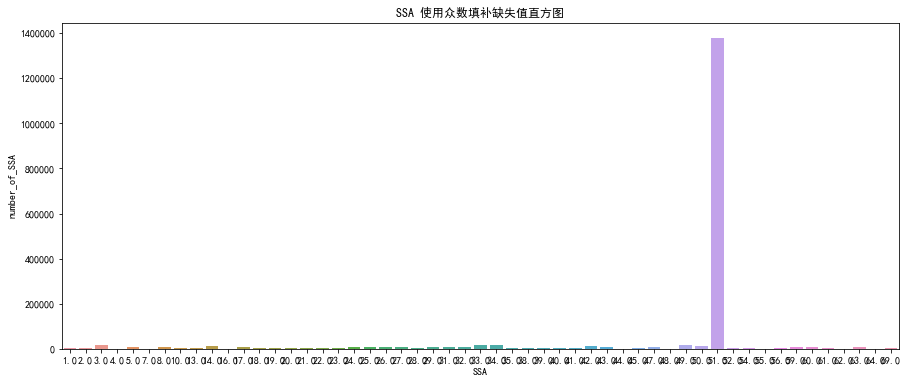

In [21]:
# SSA 为例
# temp为众数
temp = data['SSA'].mode()[0]

# 使用fillna填充
data_most = data['SSA'].fillna(temp)

# 直方图
temp = data_most.value_counts()
df = pd.DataFrame({'SSA':temp.index, 'number_of_SSA':temp.values})

hist(df, 'SSA', 'number_of_SSA', 'SSA 使用众数填补缺失值直方图')

### 3.3 通过属性的相关关系来填补缺失值
使用STREET NUMBER对LONGITUDE进行填充

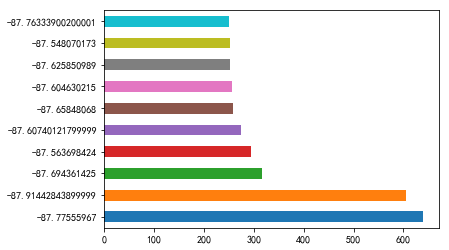

In [26]:
data_fill = pd.DataFrame(data, columns=['STREET NUMBER', 'LONGITUDE'])
data_fill['LONGITUDE'].value_counts().head(10).plot.barh()

In [ ]:
temp_dict = {}
for row in data_fill.iterrows():
    temp_dict[row[1]['STREET NUMBER']] = row[1]['LONGITUDE']

for row in data_fill.iterrows():
    street_number = dict[row[1]['STREET NUMBER']]
    row[1]['LONGITUDE'] = street_number

data_fill['LONGITUDE'].value_counts().head(10).plot.barh()

通过堆积图可以看出填充前后的变化
### 3.4 通过数据对象之间的相似性来填充缺失值

In [ ]:
data_sim = data[['LATITUDE', 'LONGITUDE']]
latitude2longitude = {}

for row in data_sim.iterrows():
    if latitude2longitude.get(row[1]['LONGITUDE'], None):
        if not pd.isnull(row[1]['LATITUDE']):
            latitude2longitude[row[1]['LONGITUDE']][0] += row[1]['LATITUDE']
            latitude2longitude[row[1]['LONGITUDE']][1] += 1
    else:
        if not pd.isnull(row[1]['LATITUDE']):
            latitude2longitude[row[1]['LONGITUDE']] = [row[1]['LATITUDE'], 1]
            
for k in latitude2longitude.keys():
    latitude2longitude[k][0] = round(latitude2longitude[k][0] / latitude2longitude[k][1], 4)

for row in data_sim.iterrows():
    if pd.isnull(row[1]['LATITUDE']):
        row[1]['LATITUDE'] = latitude2longitude[row[1]['LONGITUDE']][0]

#price直方图
temp = data_sim['LATITUDE'].value_counts()
df = pd.DataFrame({'LATITUDE':temp.index, 'number_of_LATITUDE':temp.values})

hist(df, 'LATITUDE', 'number_of_LATITUDE', 'LATITUDE 通过数据对象相似性填充直方图')